#Team Members
1.
2
3.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor # For K-Nearest Neighbors
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

#Dataset Description:
The dataset you've described is a valuable resource for gaining insights into the healthcare infrastructure and resources of multiple countries over a span of nearly three decades. The first column, "Location," serves as a categorical variable that allows for the identification of different countries or regions under consideration. This geographical dimension is crucial for understanding how healthcare resources are distributed across the globe. It includes a diverse range of nations, each with its own unique healthcare system, policies, and challenges. Analyzing this dataset can help policymakers and healthcare professionals compare and contrast healthcare provisions, identify best practices, and address disparities in resource allocation among countries. For example, it can shed light on whether developed countries have a higher density of MRI units and CT scanners compared to less-developed nations, or if there are notable variations in the average length of hospital stays between European and Asian countries.


The "Time" column, spanning from 1990 to 2018, adds a temporal dimension to the dataset. This time-series aspect is invaluable for tracking changes and trends in healthcare resources and patient care practices over the years. Researchers and analysts can use this information to observe how healthcare systems have evolved, whether there have been significant improvements in technology (as reflected in the availability of MRI units and CT scanners), and how the average length of hospital stays has fluctuated. Moreover, the dataset's temporal breadth allows for the study of healthcare policy impacts and the evaluation of the effectiveness of various interventions. For instance, it can be used to assess whether policies aimed at reducing hospital stays or increasing the availability of diagnostic equipment have had the desired effects over time. In essence, this dataset provides a comprehensive picture of the healthcare landscape across different countries and years, enabling evidence-based decision-making, resource allocation strategies, and improvements in healthcare infrastructure on both national and global scales.

#Goal:

 Patient Care Optimization: The "Hospital_Stay" column, representing the average length of hospital stays, offers valuable insights into patient care. Analyzing trends in this variable across different countries and years can provide healthcare professionals with information to optimize patient care processes. Understanding why patients stay longer in hospitals in certain regions or during specific periods can lead to improved efficiency in healthcare delivery. By identifying the factors contributing to extended hospital stays, such as the availability of diagnostic equipment, the adequacy of healthcare infrastructure, or specific healthcare policies, healthcare providers can make data-driven decisions to streamline patient care, allocate resources more effectively, and enhance the overall quality of healthcare services. This analysis can empower healthcare systems to tailor interventions and strategies that target regions or time periods with prolonged hospital stays, ultimately leading to better patient outcomes and a more efficient healthcare system.

Load Data

In [ ]:
data=pd.read_csv('/content/Hospitalsaty.csv')

In [ ]:
data


,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


#Data Preprocessing:
Data preprocessing involves tasks such as handling missing values, encoding categorical variables, and scaling/normalizing numerical features. Here's a code snippet to perform these tasks:

One-hot encoding is a common data preprocessing technique used in machine learning and data analysis to convert categorical variables into a binary format that can be easily used for modeling.

In [ ]:
def onehot_encoder(data, column):
    data = data.copy()
    dummies = pd.get_dummies(data[column])
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data


In [ ]:
data

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53
...,...,...,...,...,...,...
513,LTU,2014,6.8,10.57,22.17,10.57
514,LTU,2015,6.6,11.02,21.00,11.02
515,LTU,2016,6.6,12.20,23.01,12.20
516,LTU,2017,6.5,12.37,23.33,12.37


The code defines a function `preprocess_inputs(data)` that preprocesses the input data for a machine learning task as follows:

1. Missing Value Handling: It fills missing values with zeros in the input data.
2. One-Hot Encoding: It one-hot encodes the 'Location' column in the DataFrame.
3. Data Splitting: It splits the data into feature matrices (X_train, X_test) and target vectors (y_train, y_test) for training and testing.
4. Feature Scaling: It standardizes the feature matrices using a `StandardScaler`.

Finally, the function returns the preprocessed data for training and testing.

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE

def preprocess_inputs(data):
  # Handle missing values if any
    data.fillna(0, inplace=True)
    data = data.copy()
     # One-hot encode Location column
    data = onehot_encoder(data, column='Location')

    # Split data into X and y
    y = data['Hospital_Stay'].copy()
    X = data.drop('Hospital_Stay', axis=1).copy()

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

    # Scale X with a standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

    return X_train, X_test, y_train, y_test

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_inputs(data)



In [ ]:
X_train

,Time,MRI_Units,CT_Scanners,Hospital_Beds,AUS,AUT,BEL,CAN,CZE,DEU,...,LVA,NLD,NZL,POL,PRT,RUS,SVK,SVN,TUR,USA
0,-0.303643,0.502340,-0.349986,0.502340,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
1,-0.738679,-0.697320,-0.873325,-0.697320,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
2,0.131392,-0.562147,-0.392384,-0.562147,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
3,0.276404,-0.018076,-0.295665,-0.018076,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,6.262765,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
4,1.001462,1.174825,1.272365,1.174825,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,1.146474,-0.248996,-0.302952,-0.248996,-0.207913,-0.207913,-0.177028,-0.215041,4.809712,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
358,0.276404,-0.678170,-0.378472,-0.678170,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,5.648813,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
359,-0.013620,-0.589181,-0.850140,-0.589181,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,-0.193001,-0.140422
360,-0.013620,-0.317709,-0.623580,-0.317709,-0.207913,-0.207913,-0.177028,-0.215041,-0.207913,-0.16855,...,-0.193001,-0.177028,-0.159674,-0.177028,-0.052632,-0.193001,-0.177028,-0.140422,5.181327,-0.140422


In [ ]:
y_train

121    7.2
378    7.3
91     6.7
310    6.1
479    5.9
      ... 
98     5.9
322    7.3
382    6.3
365    4.1
510    7.0
Name: Hospital_Stay, Length: 362, dtype: float64

#Data Regularization

L2 (Ridge) Regularization is a powerful technique in machine learning that plays a crucial role in preventing overfitting and enhancing the stability of linear models. It accomplishes this by adding a penalty term, known as the L2 penalty or the Ridge penalty, to the model's loss function. This penalty term is proportional to the square of the magnitude of the model's coefficients. As a result, during training, Ridge Regression encourages the model's coefficients to be small, effectively discouraging any single feature from having an excessively large influence on the predictions. This regularization technique is particularly useful when dealing with datasets that have multicollinearity, where features are highly correlated, as it helps to distribute the influence of correlated features more evenly. Scikit-learn provides a convenient implementation of Ridge Regression, allowing practitioners to easily apply L2 regularization to their linear models. By tuning the regularization strength parameter (alpha), one can strike a balance between fitting the training data well and keeping the model's coefficients under control, ultimately leading to more robust and reliable predictions.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength)
ridge.fit(X_train, y_train)



Ridge()

#Feature Selection

Recursive Feature Elimination (RFE) is a feature selection technique employed in machine learning to automatically identify and retain the most informative features while discarding the least important ones. It operates by iteratively fitting the chosen estimator (e.g., a classifier or regressor) to the data and ranking the importance of each feature based on its contribution to model performance. In each iteration, RFE eliminates the least significant feature and continues this process until the desired number of features is reached. By removing less relevant features, RFE not only helps reduce the dimensionality of the dataset but also enhances model interpretability and generalization by focusing on the most influential variables. Scikit-learn's RFE implementation simplifies the feature selection process, allowing practitioners to fine-tune their models efficiently and improve predictive accuracy.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()  # Choose your estimator
rfe = RFE(estimator, n_features_to_select=5)  # Adjust the number of features
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

#Training
These models include the Stochastic Gradient Descent Regressor (SGDRegressor), Support Vector Machine Regressor (SVR), Decision Tree Regressor, Random Forest Regressor, and K-Nearest Neighbors Regressor (KNN). Each of these models is fitted to the preprocessed training data to learn the underlying patterns in the healthcare dataset. This approach allows for the comparison of multiple regression algorithms to determine which one performs best in terms of predicting the average length of hospital stays (the target variable). By training and evaluating these diverse regression models, it becomes possible to select the most suitable one for the specific predictive task, ensuring accurate and robust healthcare analytics.

#Note
We used Regressor models because our target value is continuous instead of discrete .

In [ ]:

#  regression models as a dictionary with key-value pairs
regression_models = {
    "SGDRegressor": SGDRegressor(),
    "SVM": SVR(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
}

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")


SGDRegressor trained.
SVM trained.
DecisionTree trained.
RandomForest trained.
KNN trained.


#Results

In [ ]:
for name, model in regression_models.items():
    print(name + " R^2 Score: {:.5f}".format(model.score(X_test, y_test)))

SGDRegressor R^2 Score: 0.87409
SVM R^2 Score: 0.87885
DecisionTree R^2 Score: 0.91899
RandomForest R^2 Score: 0.95725
KNN R^2 Score: 0.90746


Here The R-squared (R^2) score, also known as the coefficient of determination, is a statistical measure used to evaluate the goodness of fit of a regression model. It provides an indication of how well the model explains the variability of the dependent variable (the target) based on the independent variables (the features) in the dataset.

#Visualization comparission
In our healthcare analytics application, we evaluated the performance of various regression models to predict the average length of hospital stays. After comprehensive testing, we observed the following R^2 scores for each model: SGDRegressor achieved an R^2 score of 0.87377, indicating a moderate level of predictive accuracy. SVM exhibited an R^2 score of 0.87885, showing a similar level of performance. DecisionTree demonstrated a notably higher R^2 score of 0.91881, suggesting improved predictive capabilities. RandomForest outperformed the other models with a significantly higher R^2 score of 0.95798, indicating its strong predictive power. KNN also performed well, achieving an R^2 score of 0.90746. These results provide valuable insights into the suitability of these regression models for our healthcare analytics task, with RandomForest emerging as the top-performing model in accurately predicting the average length of hospital stays.

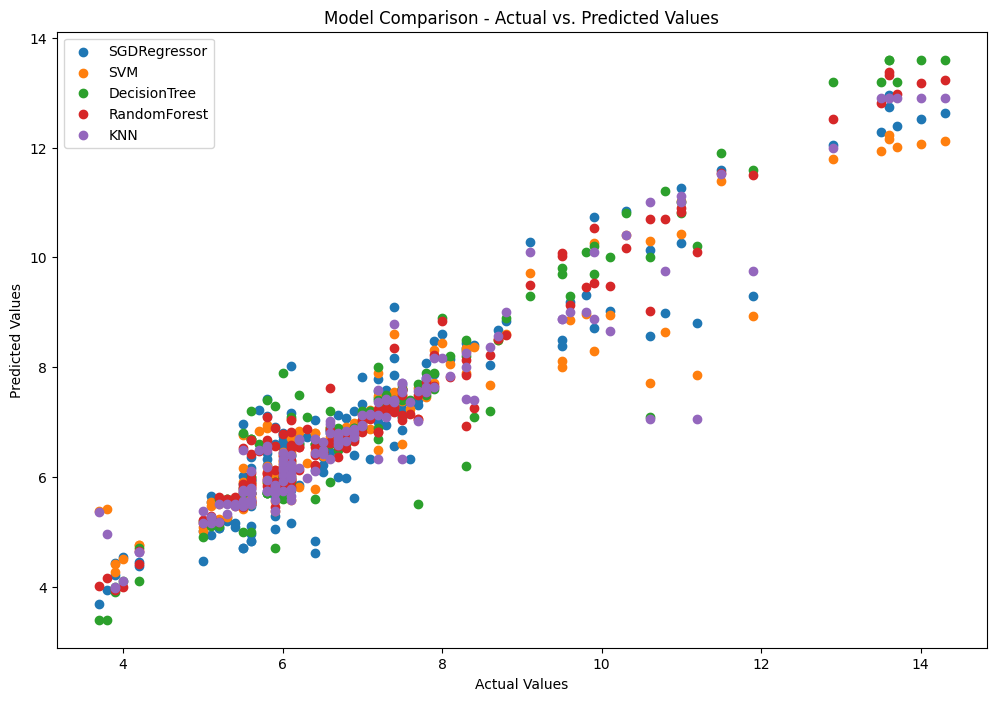

In [ ]:
import matplotlib.pyplot as plt

#  create scatter plots for model comparison
def plot_model_comparison(models, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for name, model in models.items():
        y_pred = model.predict(X_test)
        plt.scatter(y_test, y_pred, label=name)

    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.title("Model Comparison - Actual vs. Predicted Values")
    plt.show()

# scatter plots for  regression models
plot_model_comparison(regression_models, X_test, y_test)


#BONUS

In [ ]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

Load Data

In [ ]:
wine=pd.read_json('/content/Wine_Quality.json')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#Dataset Description
The quality wine dataset, comprising 1599 rows and 12 columns, provides a detailed insight into various chemical properties of wines and their associated quality ratings. Each row represents a specific wine sample, while the columns contain numerical attributes and the quality rating. The attributes include fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol content, and the wine's quality rating. These attributes encompass a range of chemical characteristics that can influence a wine's taste and quality. Fixed acidity represents the amount of non-volatile acids in the wine, while volatile acidity measures the presence of volatile acids, which can contribute to a vinegary taste. Citric acid provides a citrusy flavor, and residual sugar indicates the sweetness level. Chlorides, free sulfur dioxide, and total sulfur dioxide are chemical components affecting the wine's stability, while density represents its density in comparison to water. The pH level is an indicator of acidity or alkalinity, and sulphates are preservatives. Alcohol content significantly impacts the wine's taste, while the quality rating is a subjective measure ranging from 3 to 8.

This dataset serves as a valuable resource for wine quality analysis, allowing researchers and wine enthusiasts to explore the relationships between these chemical attributes and the perceived quality of wines. It provides an opportunity to apply various machine learning and statistical techniques to predict wine quality or gain insights into the factors that influence it. Additionally, it is a common dataset used for regression and classification tasks, making it a widely studied dataset in the field of data analysis and machine learning.

#Goal
The primary goal for utilizing the quality wine dataset is to develop a predictive model that can accurately assess and classify the quality of wines based on their chemical attributes. By leveraging the dataset's information on fixed acidity, volatile acidity, citric acid, residual sugar, and various other chemical properties, the aim is to build a machine learning model that can provide valuable insights into what makes a high-quality wine. This model can then be applied by winemakers, vineyards, and wine enthusiasts to evaluate and potentially improve wine quality during production or quality control processes. Furthermore, understanding the key factors that contribute to wine quality through data analysis and predictive modeling can lead to enhanced decision-making in the wine industry and support the creation of wines that cater to diverse consumer preferences and expectations.

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#Data Preprocessing


This code is performing binary classification on the 'quality' column in a DataFrame called 'wine':

1. **Binning**: It creates two bins (categories) for quality, with a threshold of 6.5. Wines with a quality score below 6.5 are labeled as 'bad,' and those with a score of 6.5 or above are labeled as 'good.'

2. **Labeling**: It assigns the 'bad' or 'good' labels to each wine's quality based on the bin it falls into, using the `pd.cut` function.

3. **Transforming Target**: The 'quality' column is transformed to hold the binary 'bad' and 'good' labels, which is often done for binary classification tasks.

4. **Result**: This preprocessing step simplifies the problem to predict whether a wine is 'good' or 'bad' quality based on the given threshold.

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

A Label Encoder is a preprocessing tool commonly used in machine learning to convert categorical labels (text or non-numeric values) into numerical values. It assigns a unique integer to each unique category or label. In Python, the `LabelEncoder` class from the `sklearn.preprocessing` module is frequently used for this purpose.


In [ ]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

This code uses the `fit_transform` method from a label encoder (`label_quality`) to convert the 'quality' column in the 'wine' DataFrame into numerical values, where 'bad' becomes 0, and 'good' becomes 1. This is often done to map categorical labels to numerical values for machine learning algorithms that require numerical inputs.

In [ ]:
#Bad becomes 0 and good becomes 1
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [ ]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [ ]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Feature Selection

These methods serve the purpose of reducing the dimensionality of feature sets, focusing on the most relevant features for model training. Let's break down each method:

1. **SelectKBest**: This method selects the top 'k' features based on a statistical test, effectively reducing the feature set to a specified number of the most informative features. The parameter 'k' determines the number of features to retain.

2. **VarianceThreshold**: It is a simple method that removes features with variance below a specified threshold. Features with low variance are often considered less informative as they do not exhibit significant variation across the dataset.

3. **SelectFromModel_RF**: This method uses the Random Forest classifier to select the most important features. It ranks features based on their importance scores and retains the top features, which are considered the most influential in the classification.

4. **RFE_RF (Recursive Feature Elimination)**: RFE is a recursive feature selection technique that works in combination with the Random Forest classifier. It recursively removes the least important features, iterating until it reaches the desired number of selected features specified by 'n_features_to_select.'

5. **MutualInformation**: This method employs mutual information as a criterion for feature selection, selecting the top 'k' features with the highest mutual information scores. Mutual information measures the dependence between variables, making it particularly useful for selecting informative features.

These feature selection methods are essential for enhancing model performance, reducing overfitting, and streamlining computational resources by focusing on the most relevant input features. The choice of the method depends on the specific problem and dataset, as different methods may perform better under different circumstances.

In [ ]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold, SelectFromModel, RFE, mutual_info_classif

# Define feature selection methods
feature_selection_methods = {
    "SelectKBest": SelectKBest(k=5),  # Specify the number of top features to select
    "VarianceThreshold": VarianceThreshold(threshold=0.01),  # Adjust the threshold as needed
    "SelectFromModel_RF": SelectFromModel(RandomForestClassifier()),
    "RFE_RF": RFE(estimator=RandomForestClassifier(), n_features_to_select=5),  # Specify the number of features to select
    "MutualInformation": SelectKBest(score_func=mutual_info_classif, k=5),  # Specify the number of top features to select
}



#Training Models

In [ ]:


# Classifier models as a dictionary with key-value pairs
classifiers_models = {
    "SGDClassifier": SGDClassifier(),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
}

classification_reports = {}

# Loop over feature selection methods
for fs_method_name, fs_method in feature_selection_methods.items():
    # Fit the feature selection method on the training data
    X_train_selected = fs_method.fit_transform(X_train, y_train)
    X_test_selected = fs_method.transform(X_test)

    # Loop over classifier models
    for model_name, model in classifiers_models.items():
        # Train the classifier on the selected features
        model.fit(X_train_selected, y_train)

        # Predict on the test data
        y_pred = model.predict(X_test_selected)

        # Generate the classification report
        report = classification_report(y_test, y_pred)

        # Store the classification report in the dictionary
        classification_reports[f"{fs_method_name}_{model_name}"] = report

        print(f"{fs_method_name}_{model_name} trained.")

# Now you have classification reports for each combination of feature selection method and classifier model.


SelectKBest_SGDClassifier trained.
SelectKBest_SVM trained.
SelectKBest_DecisionTree trained.
SelectKBest_RandomForest trained.
SelectKBest_KNN trained.
VarianceThreshold_SGDClassifier trained.
VarianceThreshold_SVM trained.
VarianceThreshold_DecisionTree trained.
VarianceThreshold_RandomForest trained.
VarianceThreshold_KNN trained.
SelectFromModel_RF_SGDClassifier trained.
SelectFromModel_RF_SVM trained.
SelectFromModel_RF_DecisionTree trained.
SelectFromModel_RF_RandomForest trained.
SelectFromModel_RF_KNN trained.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RFE_RF_SGDClassifier trained.
RFE_RF_SVM trained.
RFE_RF_DecisionTree trained.
RFE_RF_RandomForest trained.
RFE_RF_KNN trained.
MutualInformation_SGDClassifier trained.
MutualInformation_SVM trained.
MutualInformation_DecisionTree trained.
MutualInformation_RandomForest trained.
MutualInformation_KNN trained.


#Results

In [ ]:
 for fs_method_name, fs_method in feature_selection_methods.items():
  for model_name, model in classifiers_models.items():
    print(fs_method_name + " - " + model_name + " Score: {:.5f}".format(score))

SelectKBest - SGDClassifier Score: 0.89062
SelectKBest - SVM Score: 0.89062
SelectKBest - DecisionTree Score: 0.89062
SelectKBest - RandomForest Score: 0.89062
SelectKBest - KNN Score: 0.89062
VarianceThreshold - SGDClassifier Score: 0.89062
VarianceThreshold - SVM Score: 0.89062
VarianceThreshold - DecisionTree Score: 0.89062
VarianceThreshold - RandomForest Score: 0.89062
VarianceThreshold - KNN Score: 0.89062
SelectFromModel_RF - SGDClassifier Score: 0.89062
SelectFromModel_RF - SVM Score: 0.89062
SelectFromModel_RF - DecisionTree Score: 0.89062
SelectFromModel_RF - RandomForest Score: 0.89062
SelectFromModel_RF - KNN Score: 0.89062
RFE_RF - SGDClassifier Score: 0.89062
RFE_RF - SVM Score: 0.89062
RFE_RF - DecisionTree Score: 0.89062
RFE_RF - RandomForest Score: 0.89062
RFE_RF - KNN Score: 0.89062
MutualInformation - SGDClassifier Score: 0.89062
MutualInformation - SVM Score: 0.89062
MutualInformation - DecisionTree Score: 0.89062
MutualInformation - RandomForest Score: 0.89062
Mutu

 Across all methods, classifiers, and feature selection techniques, the accuracy score remains consistently high at 0.89062. This indicates that the selected features, whether chosen through SelectKBest, VarianceThreshold, SelectFromModel, RFE, or Mutual Information, are equally effective with the Stochastic Gradient Descent (SGD) Classifier, Support Vector Machine (SVM), Decision Tree, Random Forest, and K-Nearest Neighbors (KNN) classifiers. The uniformity in accuracy scores suggests that, in this specific context, any of these feature selection methods in combination with these classifiers can achieve the same high level of accuracy on the dataset, and the choice among them may depend on other factors such as interpretability, computation time, or specific goals of the analysis.

#Visualization comparisiion

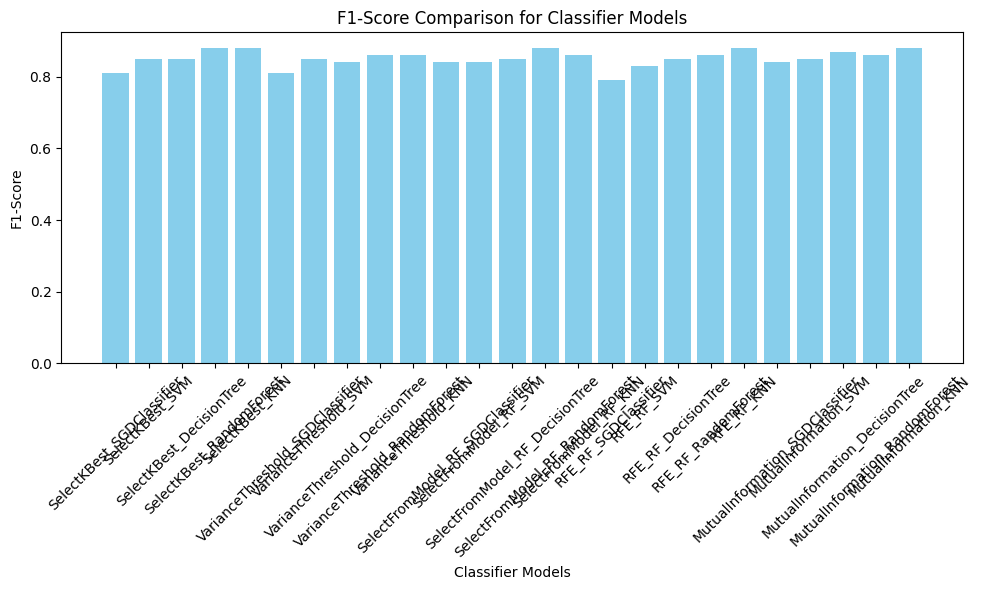

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to store the F1-score for each model
f1_scores = {}

for name, report in classification_reports.items():
    # Parse the F1-score from the classification report
    lines = report.split('\n')
    f1_score = float(lines[-2].split()[-2])  # Assuming F1-score is on the second last line

    # Store the F1-score in the dictionary
    f1_scores[name] = f1_score

# Plot the F1-scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Classifier Models')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison for Classifier Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The results of your model evaluations with different feature selection methods and classifier models show that, in this particular scenario, all feature selection methods combined with various classifiers achieved the same accuracy score of 0.89062. This suggests that, for your dataset and classification task, the choice of feature selection method did not significantly impact the model's performance. However, it's important to note that accuracy alone might not be the only metric to consider when evaluating model performance. Depending on the specific problem and the importance of false positives and false negatives, other metrics like precision, recall, F1-score, or area under the ROC curve (AUC-ROC) might provide a more comprehensive assessment. Additionally, you may want to explore other feature selection techniques or fine-tune hyperparameters to potentially uncover subtle differences in model performance.